In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("merged.csv", index_col=0)

In [3]:
# convert acquisition_date to yearly granularity
df['acquisition_date'] = \
    df['acquisition_date']\
        .apply(lambda x: x[:4])\
        .astype('datetime64[ns]')

In [4]:
df.head()

,artwork_id,title,artist_id,name,creation_date,medium,dimensions,acquisition_date,credit,catalogue,...,height,length,width,depth,weight,duration,fullname,nationality,gender,race
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896.0,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-01-01,Fractional and promised gift of Jo Carole and ...,Y,...,48.6000,NaN,168.9000,NaN,NaN,NaN,otto wagner,austrian,m,white
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987.0,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-01,Gift of the architect in honor of Lily Auchinc...,Y,...,40.6401,NaN,29.8451,NaN,NaN,NaN,christian de portzamparc,french,m,asian
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903.0,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-01,Gift of Jo Carole and Ronald S. Lauder,Y,...,34.3000,NaN,31.8000,NaN,NaN,NaN,emil hoppe,austrian,m,white
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980.0,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-01,Purchase and partial gift of the architect in ...,Y,...,50.8000,NaN,50.8000,NaN,NaN,NaN,bernard tschumi,NaN,m,white
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903.0,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-01,Gift of Jo Carole and Ronald S. Lauder,Y,...,38.4000,NaN,19.1000,NaN,NaN,NaN,emil hoppe,austrian,m,white


### Examination of MoMA's collection through the years by race

In [5]:
race_by_acquisition_year = \
    df[['acquisition_date', 'race']]\
        .sort_values(by='acquisition_date')

In [6]:
race_by_acquisition_year = pd.get_dummies(race_by_acquisition_year).set_index("acquisition_date")

In [7]:
# drop first row (edge case)
race_by_acquisition_year = race_by_acquisition_year.iloc[1:]

In [10]:
race_by_acquisition_year.head()

,race_aian,race_asian,race_black,race_hispanic,race_mix,race_white
acquisition_date,,,,,,
1929-01-01,0,0,0,0,0,1
1929-01-01,0,0,0,0,0,1
1929-01-01,0,0,0,0,0,1
1929-01-01,0,0,0,0,0,1
1929-01-01,0,0,0,0,0,0


In [24]:
race_by_acquisition_year = \
    race_by_acquisition_year\
        .groupby(race_by_acquisition_year.index)[
            'race_aian', 
            'race_asian', 
            'race_black', 
            'race_hispanic', 
            'race_mix', 
            'race_white']\
        .sum()

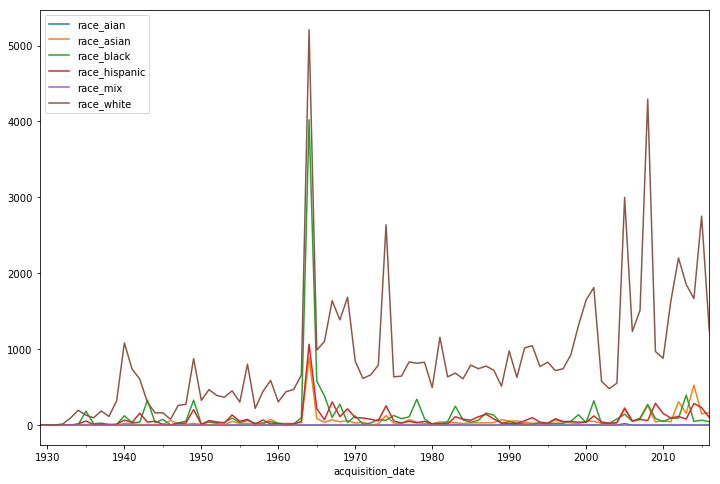

In [28]:
race_by_acquisition_year.plot(figsize=(12,8))


### Examination of MoMA's collection through the years by artist gender

In [29]:
gender_by_acquisition_year = \
    df[['acquisition_date', 'gender']]\
        .sort_values(by='acquisition_date')

In [30]:
gender_by_acquisition_year = pd.get_dummies(gender_by_acquisition_year).set_index("acquisition_date")

In [32]:
# drop first row (edge case)
gender_by_acquisition_year = gender_by_acquisition_year.iloc[1:]

In [33]:
gender_by_acquisition_year.head()

,gender_f,gender_m
acquisition_date,,
1929-01-01,0,1
1929-01-01,0,1
1929-01-01,0,1
1929-01-01,0,1
1929-01-01,0,1


In [34]:
gender_by_acquisition_year = \
    gender_by_acquisition_year\
        .groupby(gender_by_acquisition_year.index)[
            'gender_f', 
            'gender_m']\
        .sum()

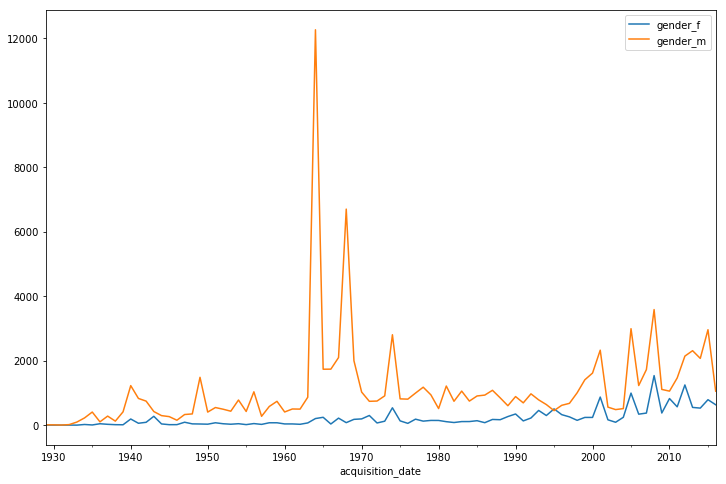

In [35]:
gender_by_acquisition_year.plot(figsize=(12,8))
